## Decision Tree Classifier를 이용한 버섯 식용 여부 예측 

원본 데이터 셋 링크: https://www.kaggle.com/datasets/uciml/mushroom-classification/data  

버섯에 대한 메타 데이터가 주어지고, 먹을 수 있는지 없는지 여부를 표시한 데이터가 있습니다. 지금까지 배운 내용들을 활용해서 예측 모델을 만들고, 아래 포맷으로 submission을 만들어서 제출해보세요.

### 요구사항

- 데이터 특성 파악하기
- 데이터 전처리하기 
- decision tree 계열 알고리즘을 사용하여 분류 모델 학습시키고 교차 검증하기
- 테스트 셋에 대하여 인퍼런스 한 뒤, 적어도 한번 결과 제출하기 

### 데이터 불러오기

In [79]:
import pandas as pd

train_df = pd.read_csv("./data/mushroom_train.csv")
test_df = pd.read_csv("./data/mushroom_test.csv")

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   mushroom_id               6500 non-null   int64 
 1   class                     6500 non-null   object
 2   cap-shape                 6500 non-null   object
 3   cap-surface               6500 non-null   object
 4   cap-color                 6500 non-null   object
 5   bruises                   6500 non-null   object
 6   odor                      6500 non-null   object
 7   gill-attachment           6500 non-null   object
 8   gill-spacing              6500 non-null   object
 9   gill-size                 6500 non-null   object
 10  gill-color                6500 non-null   object
 11  stalk-shape               6500 non-null   object
 12  stalk-root                6500 non-null   object
 13  stalk-surface-above-ring  6500 non-null   object
 14  stalk-surface-below-ring

In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   mushroom_id               1624 non-null   int64 
 1   cap-shape                 1624 non-null   object
 2   cap-surface               1624 non-null   object
 3   cap-color                 1624 non-null   object
 4   bruises                   1624 non-null   object
 5   odor                      1624 non-null   object
 6   gill-attachment           1624 non-null   object
 7   gill-spacing              1624 non-null   object
 8   gill-size                 1624 non-null   object
 9   gill-color                1624 non-null   object
 10  stalk-shape               1624 non-null   object
 11  stalk-root                1624 non-null   object
 12  stalk-surface-above-ring  1624 non-null   object
 13  stalk-surface-below-ring  1624 non-null   object
 14  stalk-color-above-ring  

### 데이터 전처리하기

#### 데이터 합쳐주기

In [84]:
df = pd.concat([train_df, test_df]).reset_index(drop=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   mushroom_id               8124 non-null   int64 
 1   class                     6500 non-null   object
 2   cap-shape                 8124 non-null   object
 3   cap-surface               8124 non-null   object
 4   cap-color                 8124 non-null   object
 5   bruises                   8124 non-null   object
 6   odor                      8124 non-null   object
 7   gill-attachment           8124 non-null   object
 8   gill-spacing              8124 non-null   object
 9   gill-size                 8124 non-null   object
 10  gill-color                8124 non-null   object
 11  stalk-shape               8124 non-null   object
 12  stalk-root                8124 non-null   object
 13  stalk-surface-above-ring  8124 non-null   object
 14  stalk-surface-below-ring

### Explore Data Analysis

In [126]:

import seaborn as sns
from matplotlib import pyplot as plt

In [192]:
df['class'].value_counts()

class
e    3701
p    2799
Name: count, dtype: int64

<Axes: xlabel='habitat', ylabel='count'>

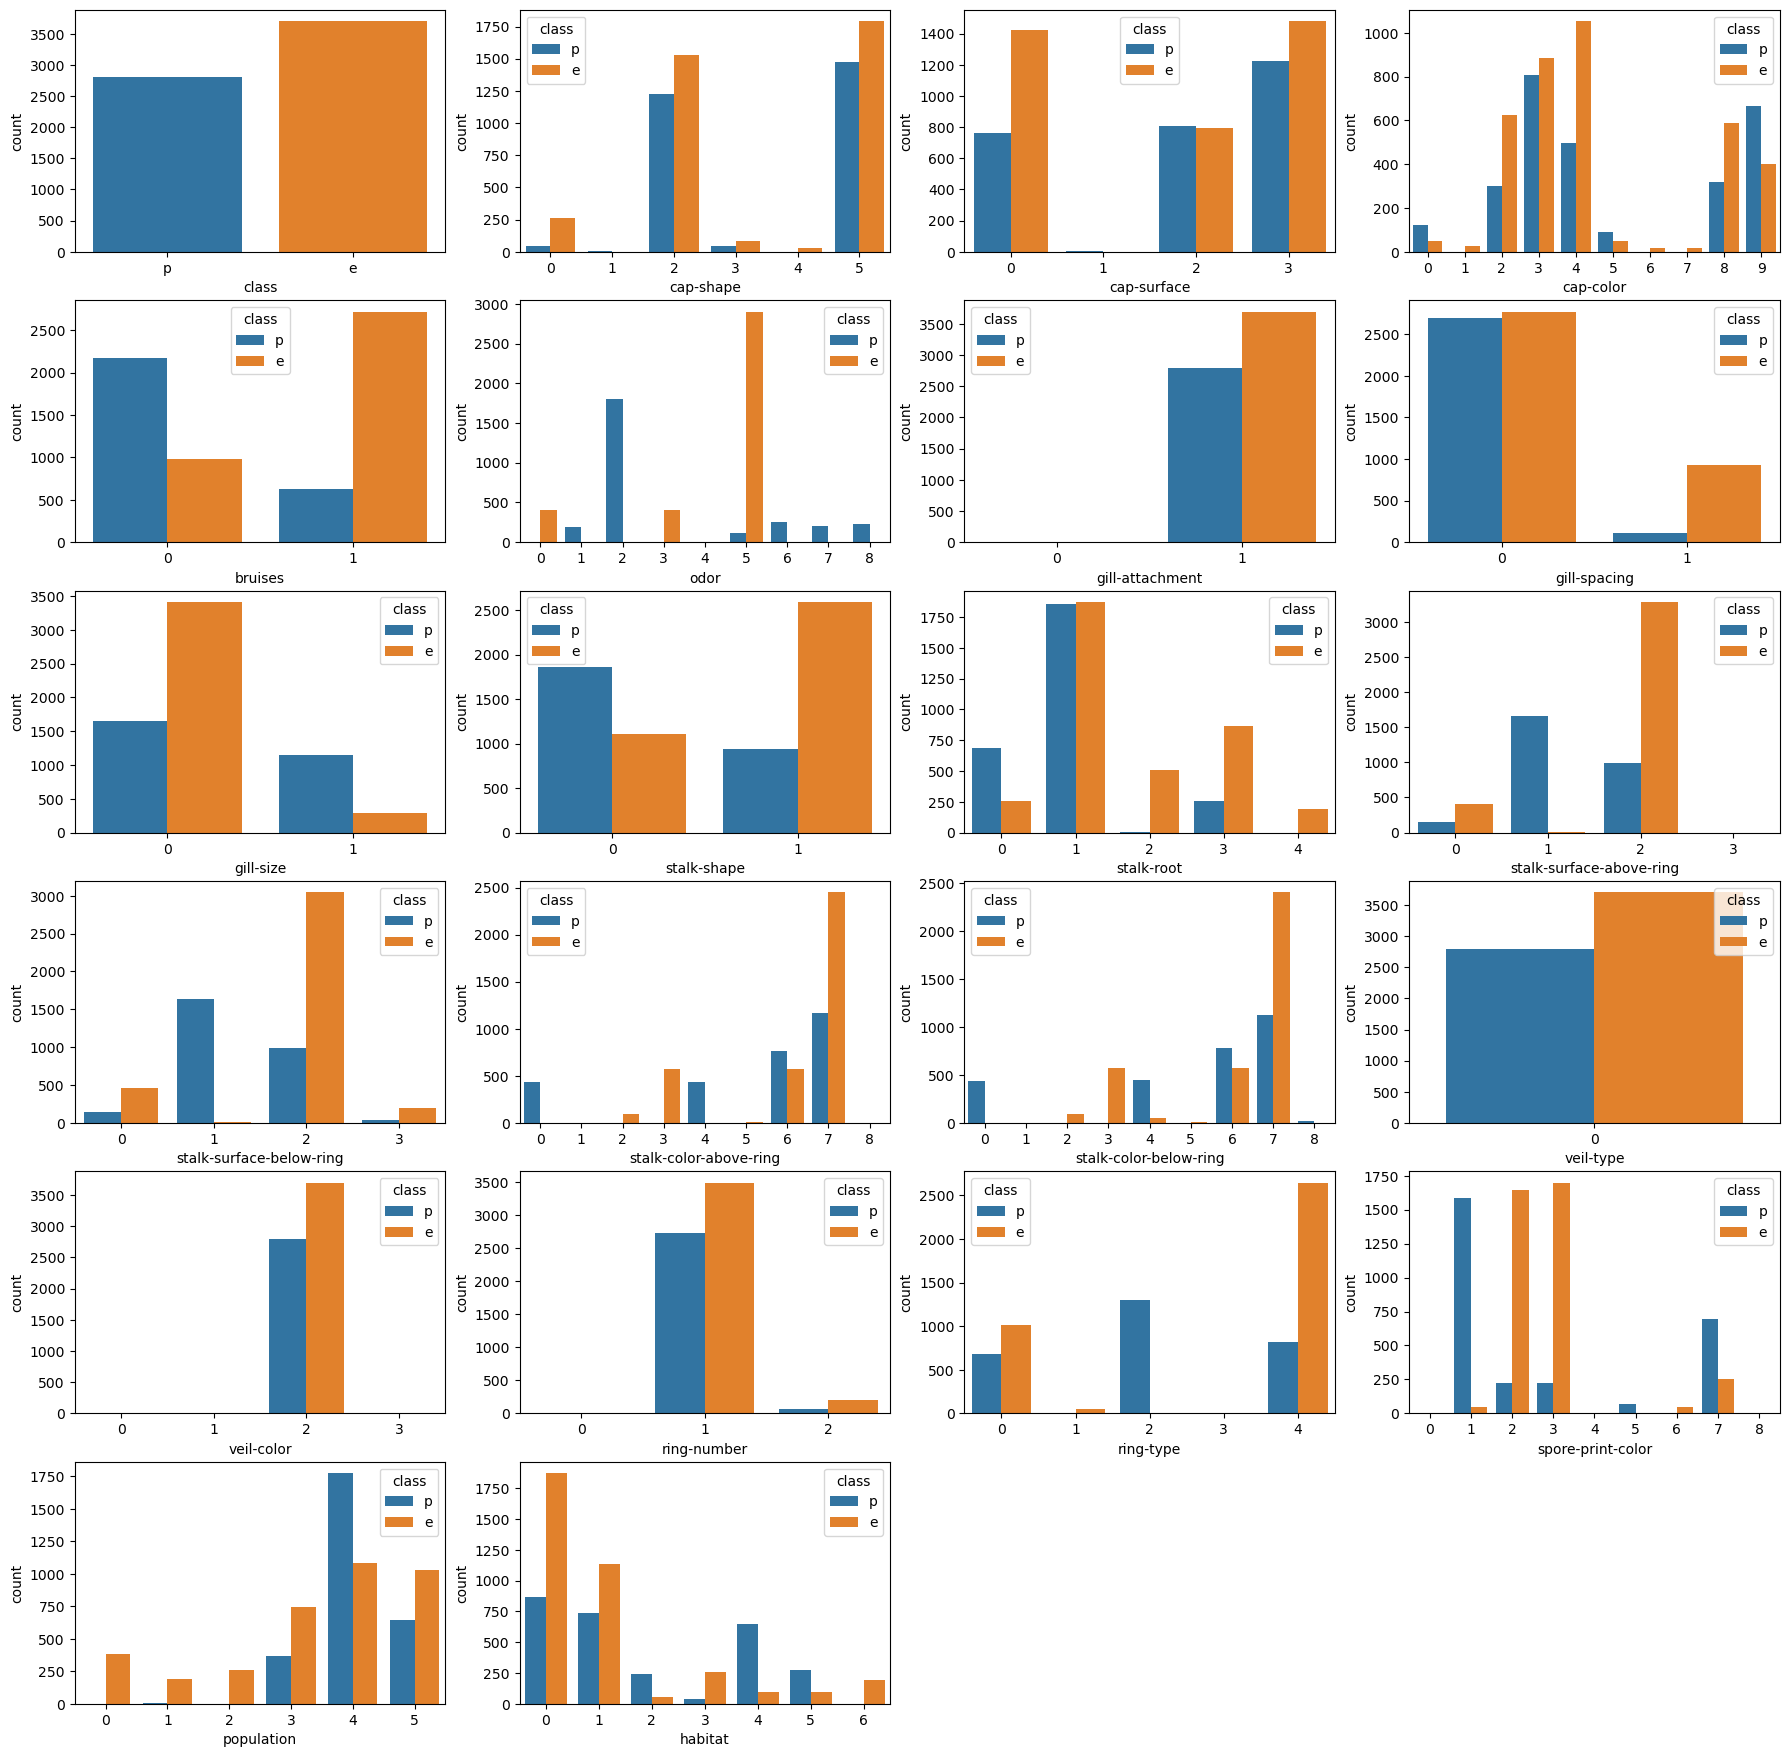

In [135]:
fig = plt.figure(figsize=(22,22))
ax1 = fig.add_subplot(6,4,1)
ax2 = fig.add_subplot(6,4,2)
ax3 = fig.add_subplot(6,4,3)
ax4 = fig.add_subplot(6,4,4)
ax5 = fig.add_subplot(6,4,5)
ax6 = fig.add_subplot(6,4,6)
ax7 = fig.add_subplot(6,4,7)
ax8 = fig.add_subplot(6,4,8)
ax9 = fig.add_subplot(6,4,9)
ax10 = fig.add_subplot(6,4,10)
ax11 = fig.add_subplot(6,4,11)
ax12 = fig.add_subplot(6,4,12)
ax13 = fig.add_subplot(6,4,13)
ax14 = fig.add_subplot(6,4,14)
ax15 = fig.add_subplot(6,4,15)
ax16 = fig.add_subplot(6,4,16)
ax17 = fig.add_subplot(6,4,17)
ax18 = fig.add_subplot(6,4,18)
ax19 = fig.add_subplot(6,4,19)
ax20 = fig.add_subplot(6,4,20)
ax21 = fig.add_subplot(6,4,21)
ax22 = fig.add_subplot(6,4,22)


sns.countplot(data=df, x='class', ax=ax1)
sns.countplot(data=df, x='cap-shape', hue='class', ax=ax2)
sns.countplot(data=df, x='cap-surface', hue='class',ax=ax3)
sns.countplot(data=df, x='cap-color', hue='class', ax=ax4)
sns.countplot(data=df, x='bruises', hue='class', ax=ax5)
sns.countplot(data=df, x='odor', hue='class', ax=ax6)
sns.countplot(data=df, x='gill-attachment', hue='class', ax=ax7)
sns.countplot(data=df, x='gill-spacing', hue='class', ax=ax8)
sns.countplot(data=df, x='gill-size', hue='class', ax=ax9)
sns.countplot(data=df, x='stalk-shape', hue='class', ax=ax10)
sns.countplot(data=df, x='stalk-root', hue='class', ax=ax11)
sns.countplot(data=df, x='stalk-surface-above-ring', hue='class', ax=ax12)
sns.countplot(data=df, x='stalk-surface-below-ring', hue='class', ax=ax13)
sns.countplot(data=df, x='stalk-color-above-ring', hue='class', ax=ax14)
sns.countplot(data=df, x='stalk-color-below-ring', hue='class', ax=ax15)
sns.countplot(data=df, x='veil-type', hue='class', ax=ax16)
sns.countplot(data=df, x='veil-color', hue='class', ax=ax17)
sns.countplot(data=df, x='ring-number', hue='class', ax=ax18)
sns.countplot(data=df, x='ring-type', hue='class', ax=ax19)
sns.countplot(data=df, x='spore-print-color', hue='class', ax=ax20)
sns.countplot(data=df, x='population', hue='class', ax=ax21)
sns.countplot(data=df, x='habitat', hue='class', ax=ax22)

In [136]:
df['class'].value_counts()

class
e    3701
p    2799
Name: count, dtype: int64

In [137]:
df['cap-shape'].value_counts()

cap-shape
5    3656
2    3152
3     828
0     452
4      32
1       4
Name: count, dtype: int64

### Label Encoding

카테고리형 데이터 인코딩하기

In [87]:
!pip install scikit-learn
import sklearn

Defaulting to user installation because normal site-packages is not writeable


In [89]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i, column in enumerate(df.columns):
    if i < 2:
        continue
    df[column] = label_encoder.fit_transform(df[column])
    print(column, label_encoder.classes_)

cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [90]:
df

,mushroom_id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,e,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,e,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,p,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,4,e,5,2,3,0,5,1,1,0,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,NaN,3,2,4,0,5,0,0,0,...,2,5,5,0,1,1,4,0,1,2
8120,8120,NaN,5,2,4,0,5,0,0,0,...,2,5,5,0,0,1,4,0,4,2
8121,8121,NaN,2,2,4,0,5,0,0,0,...,2,5,5,0,1,1,4,0,1,2
8122,8122,NaN,3,3,4,0,8,1,0,1,...,1,7,7,0,2,1,0,7,4,2


### one hot encoding

카테고리형 & 서열형이 아닌 데이터 중에서 종류 3개 이하인 컬럼만 one hot encoding 시켜주기

In [92]:
import numpy as np
bruises_dummies = pd.get_dummies(df["bruises"], prefix="bruises", dtype= np.uint8)

In [93]:
df = pd.concat([df, bruises_dummies], axis=1)

In [94]:
gill_a_dummies = pd.get_dummies(df["gill-attachment"], prefix="gill-attachment", dtype= np.uint8)

In [95]:
df = pd.concat([df, gill_a_dummies], axis=1)

In [96]:
gill_s_dummies = pd.get_dummies(df["gill-spacing"], prefix="gill-spacing", dtype= np.uint8)

In [97]:
df = pd.concat([df, gill_s_dummies], axis=1)

In [98]:
gill_size_dummies = pd.get_dummies(df["gill-size"], prefix="gill-size", dtype= np.uint8)

In [99]:
df = pd.concat([df, gill_size_dummies], axis=1)

In [100]:
stalk_shape_dummies = pd.get_dummies(df["stalk-shape"], prefix="stalk-shape", dtype= np.uint8)

In [101]:
df = pd.concat([df, stalk_shape_dummies], axis=1)

In [102]:
veil_type_dummies = pd.get_dummies(df["veil-type"], prefix="veil-type", dtype= np.uint8)

In [103]:
df = pd.concat([df, veil_type_dummies], axis=1)

In [104]:
ring_number_dummies = pd.get_dummies(df["ring-number"], prefix="ring-number", dtype= np.uint8)

In [105]:
df = pd.concat([df, ring_number_dummies], axis=1)

전처리 마친 컬럼 제거하기

In [107]:
df.drop(["bruises", "gill-attachment", "gill-spacing", "gill-size", "stalk-shape", "veil-type", "ring-number"], axis= 1)

,mushroom_id,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,...,gill-spacing_0,gill-spacing_1,gill-size_0,gill-size_1,stalk-shape_0,stalk-shape_1,veil-type_0,ring-number_0,ring-number_1,ring-number_2
0,0,p,5,2,4,6,4,3,2,2,...,1,0,0,1,1,0,1,0,1,0
1,1,e,5,2,9,0,4,2,2,2,...,1,0,1,0,1,0,1,0,1,0
2,2,e,0,2,8,3,5,2,2,2,...,1,0,1,0,1,0,1,0,1,0
3,3,p,5,3,8,6,5,3,2,2,...,1,0,0,1,1,0,1,0,1,0
4,4,e,5,2,3,5,4,3,2,2,...,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,NaN,3,2,4,5,11,0,2,2,...,1,0,1,0,1,0,1,0,1,0
8120,8120,NaN,5,2,4,5,11,0,2,2,...,1,0,1,0,1,0,1,0,1,0
8121,8121,NaN,2,2,4,5,5,0,2,2,...,1,0,1,0,1,0,1,0,1,0
8122,8122,NaN,3,3,4,8,0,0,2,1,...,1,0,0,1,0,1,1,0,1,0


전처리 데이터 새 파일 저장

In [239]:
df.to_csv("./data/mushroom_label_dummies.csv", index=False, encoding="utf-8")

### 랜덤 포레스트 모델 학습시키기

In [108]:
import pandas as pd

train_df = df[:6500]
test_df = df[6500:]

In [109]:
test_df = test_df.drop(["class"], axis=1)

In [243]:
test_df

,mushroom_id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,gill-spacing_0,gill-spacing_1,gill-size_0,gill-size_1,stalk-shape_0,stalk-shape_1,veil-type_0,ring-number_0,ring-number_1,ring-number_2
6500,6500,2,2,4,0,2,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6501,6501,3,3,2,0,7,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6502,6502,2,3,2,0,2,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6503,6503,2,2,2,0,2,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6504,6504,2,3,2,0,8,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,3,2,4,0,5,0,0,0,11,...,1,0,1,0,1,0,1,0,1,0
8120,8120,5,2,4,0,5,0,0,0,11,...,1,0,1,0,1,0,1,0,1,0
8121,8121,2,2,4,0,5,0,0,0,5,...,1,0,1,0,1,0,1,0,1,0
8122,8122,3,3,4,0,8,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0


#### train, test 파일 나눠서 저장

In [111]:
train_df.to_csv("./data/mushroom_preprocessed_train.csv", index=False)
test_df.to_csv("./data/mushroom_preprocessed_test.csv", index=False)

In [113]:
x_train = train_df.drop(["mushroom_id", "class"], axis=1)
y_train = train_df["class"]
x_test = test_df.drop(["mushroom_id"], axis=1)

In [114]:
x_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,gill-spacing_0,gill-spacing_1,gill-size_0,gill-size_1,stalk-shape_0,stalk-shape_1,veil-type_0,ring-number_0,ring-number_1,ring-number_2
6500,2,2,4,0,2,1,0,1,0,1,...,1,0,0,1,0,1,1,0,1,0
6501,3,3,2,0,7,1,0,1,0,1,...,1,0,0,1,0,1,1,0,1,0
6502,2,3,2,0,2,1,0,1,0,1,...,1,0,0,1,0,1,1,0,1,0
6503,2,2,2,0,2,1,0,1,0,1,...,1,0,0,1,0,1,1,0,1,0
6504,2,3,2,0,8,1,0,1,0,1,...,1,0,0,1,0,1,1,0,1,0


In [32]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=1234)

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=10,
    criterion="entropy",
    max_depth=5,
    random_state= 1234
)

In [251]:
scores = cross_val_score(model, x_train, y_train, cv=kf)

In [252]:
scores

array([0.99076923, 0.97692308, 0.97846154, 0.98923077, 0.98307692,
       0.99076923, 0.98615385, 0.99538462, 0.99538462, 0.98769231])

In [253]:
scores.mean()

0.9873846153846154

In [254]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=1234)

In [255]:
from sklearn.model_selection import StratifiedKFold

stratified_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

In [256]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [10, 30, 50],
    "max_depth": [3,5,10]
}

In [257]:
grid_search = GridSearchCV(
    estimator= model,
    param_grid= param_grid,
    cv= stratified_kf
)

In [258]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=RandomForestClassifier(criterion='entropy', max_depth=5,
                                              n_estimators=10,
                                              random_state=1234),
             param_grid={'max_depth': [3, 5, 10], 'n_estimators': [10, 30, 50]})

In [259]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 10}

In [260]:
grid_search.best_score_

0.9996923076923077

In [261]:
model = RandomForestClassifier(
    n_estimators=10,  
    criterion="entropy",
    max_depth=3,
    random_state= 1234
)

In [262]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10,
                       random_state=1234)

#### 랜덤 포레스트 feature importances 뽑아보기

In [263]:
model.feature_importances_

array([0.0014696 , 0.00649628, 0.00643419, 0.02211694, 0.05882097,
       0.        , 0.00547539, 0.00810669, 0.05276028, 0.00219424,
       0.05936897, 0.09982437, 0.08132422, 0.05963154, 0.00803715,
       0.        , 0.00184509, 0.        , 0.07065549, 0.08357312,
       0.05766573, 0.0175396 , 0.02666285, 0.02679306, 0.        ,
       0.        , 0.        , 0.04960439, 0.11949495, 0.05473361,
       0.00905904, 0.00199557, 0.        , 0.        , 0.00831669,
       0.        ])

In [264]:
ser = pd.Series(model.feature_importances_, index=df.columns[2:])

top10 = ser.sort_values(ascending=False)[:10]
print(top10)

gill-size_0                 0.119495
stalk-surface-above-ring    0.099824
spore-print-color           0.083573
stalk-surface-below-ring    0.081324
ring-type                   0.070655
stalk-color-above-ring      0.059632
stalk-root                  0.059369
odor                        0.058821
population                  0.057666
gill-size_1                 0.054734
dtype: float64


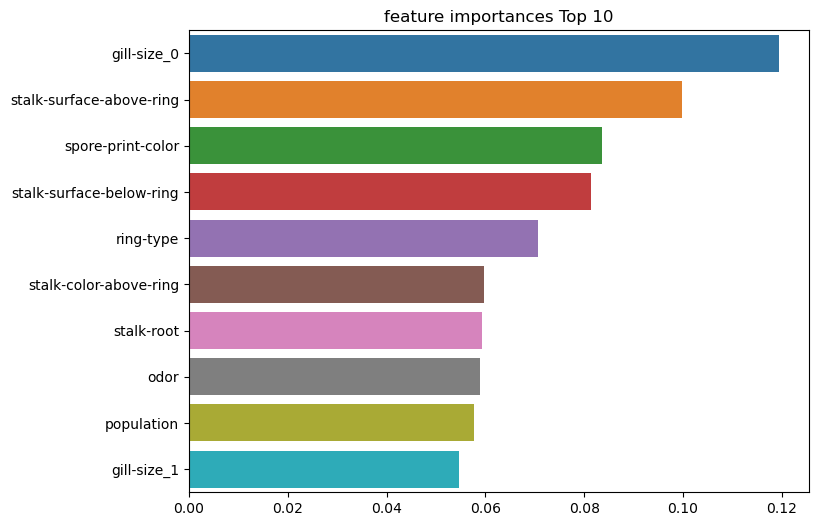

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title("feature importances Top 10")
sns.barplot(x=top10, y=top10.index)
plt.show()

### 랜덤포레스트 모델 submit 하기

In [267]:
y_test_pred = model.predict(x_test)

In [268]:
test_df["class"] = y_test_pred

In [269]:
test_df[["mushroom_id", "class"]].to_csv("./data/mushroom_submission_hot.csv", index=False)

제출 결과

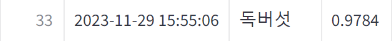

### boosting tree로 모델 학습시키기

In [115]:
from sklearn.model_selection import StratifiedKFold

stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

In [116]:
import lightgbm as lgb

model = lgb.LGBMClassifier()

In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 30, 50],
    "max_depth": [3,5,10]
} 

grid_search = GridSearchCV(
    estimator= model,
    param_grid= param_grid,
    cv= stratified_kf
)

In [118]:
result = grid_search.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[L

In [119]:
result.cv_results_

{'mean_fit_time': array([0.02838917, 0.02852321, 0.0354497 , 0.02665215, 0.0334074 ,
        0.04403639, 0.03580012, 0.0571137 , 0.0819901 ]),
 'std_fit_time': array([0.00906258, 0.00180474, 0.00488982, 0.00251214, 0.00206084,
        0.00655427, 0.00699951, 0.00574709, 0.00385576]),
 'mean_score_time': array([0.00626845, 0.00616293, 0.00619836, 0.0062737 , 0.00596442,
        0.00603962, 0.00832872, 0.00895247, 0.01046791]),
 'std_score_time': array([0.00073357, 0.00097281, 0.00084732, 0.00051964, 0.00118088,
        0.00111792, 0.00224884, 0.00136828, 0.00198139]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 30, 50, 10, 30, 50, 10, 30, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_valu

In [120]:
result.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [121]:
result.best_score_

0.9998461538461537

In [124]:
scores = cross_val_score(model, x_train, y_train, cv=kf)

[LightGBM] [Info] Number of positive: 2512, number of negative: 3338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.429402 -> initscore=-0.284293
[LightGBM] [Info] Start training from score -0.284293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [125]:
scores.mean()

0.9996923076923077

In [276]:
model = lgb.LGBMClassifier(
    n_estimators=50,
    max_depth=5
)

In [277]:
model.fit(x_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2799, number of negative: 3701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430615 -> initscore=-0.279341
[LightGBM] [Info] Start training from score -0.279341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

LGBMClassifier(max_depth=5, n_estimators=50)

#### boosting tree feature importance 뽑아보기

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

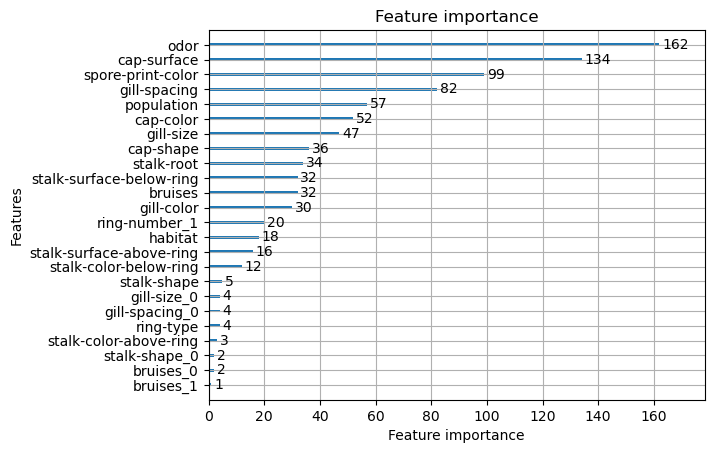

In [281]:
from lightgbm import plot_importance
plot_importance(model)

#### boosting tree 예측 모델 submit하기

In [278]:
y_test_pred = model.predict(x_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [279]:
test_df["class"] = y_test_pred

In [280]:
test_df[["mushroom_id", "class"]].to_csv("./data/mushroom_submission_lgbm.csv", index=False)

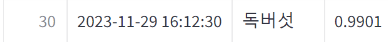